In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA




In [3]:
df = pd.read_csv("C:/Users/MANTHAN/Desktop/ml_task2/dataset_task2.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
df = df.drop('CustomerID', axis=1)


In [6]:
print(df.describe())


              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


In [59]:
original_df = df.copy()


C:\Users\MANTHAN\AppData\Local\Temp\ipykernel_24140\3298916193.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


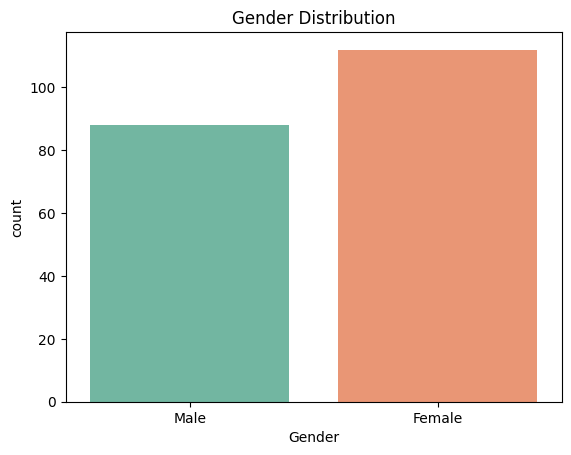

In [7]:
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()


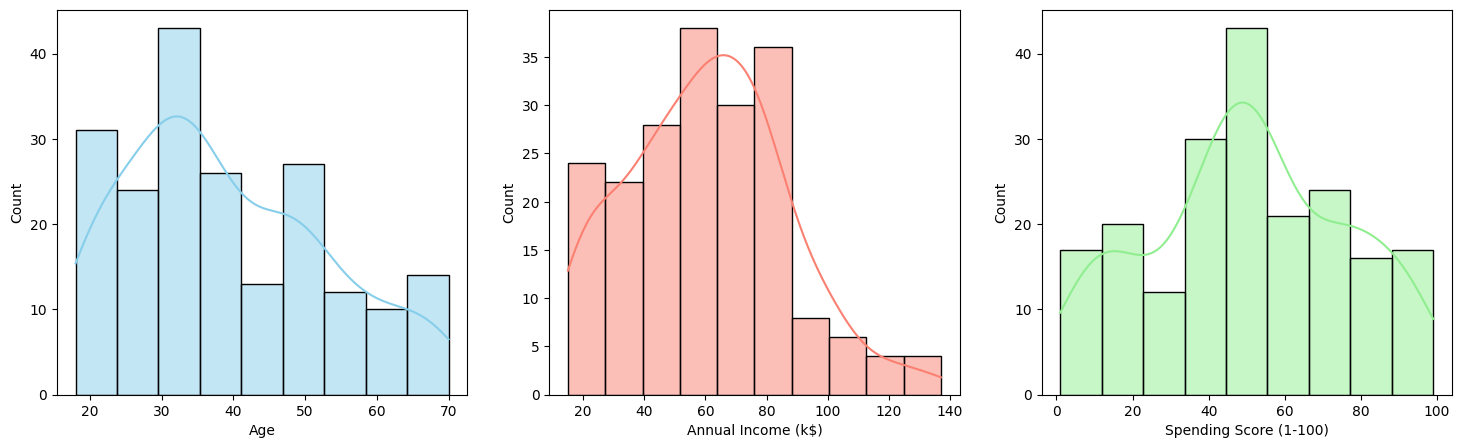

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1], color='salmon')
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2], color='lightgreen')
plt.show()



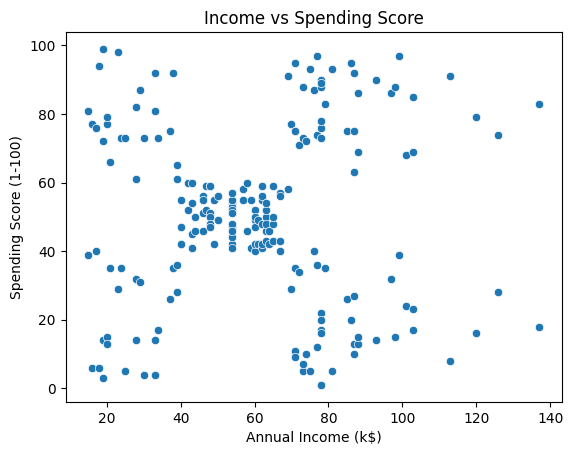

In [9]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Income vs Spending Score")
plt.show()


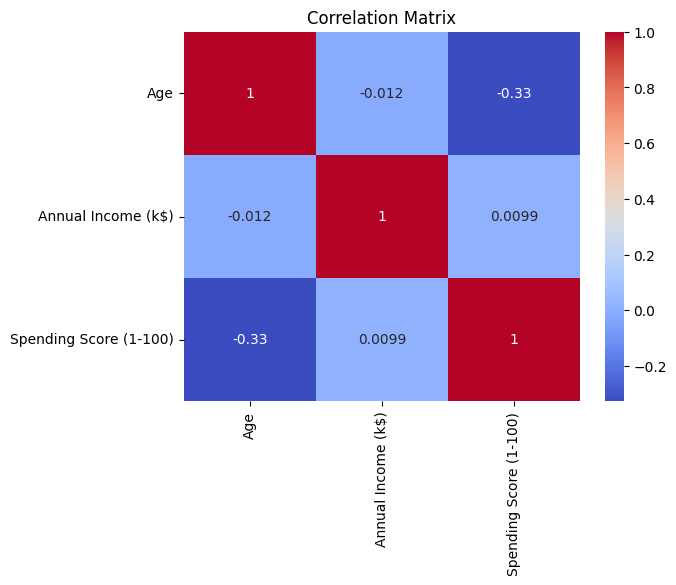

In [10]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [11]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [12]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
df_withoutgender = df.copy()

df_withoutgender = df_withoutgender.drop('Gender', axis=1)

df_withoutgender.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
scaler = StandardScaler()


scaled_data = scaler.fit_transform(df_withoutgender)
scaled_df = pd.DataFrame(scaled_data, columns=df_withoutgender.columns)
scaled_df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [15]:
fscaled_df = pd.concat([df[['Gender']],scaled_df], axis=1)
fscaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fscaled_df)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,-0.600438,-1.737179
1,-1.649886,-1.789124
2,0.315381,-1.692772
3,-1.477989,-1.781317
4,-0.060545,-1.678691


In [17]:
pca.components_[0]


array([ 0.03733834,  0.70603307, -0.04460546, -0.70578574])

spending score and age
more the age more the value of pc1 
more the spending score less the pc1 value 
basically,
higher pc1 means a older perosn with less spending score 
lower pc1 means a young person with high spedning score

In [18]:
pca.components_[1]

array([ 0.03945288,  0.02677853,  0.99827635, -0.03421569])

pc2 completly depends on the anual income of the person
more the income more the pc2

In [19]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.4095285 0.3081674]


In [20]:
# 0.70 ( approx 70%) of the data is reterived in the pca components

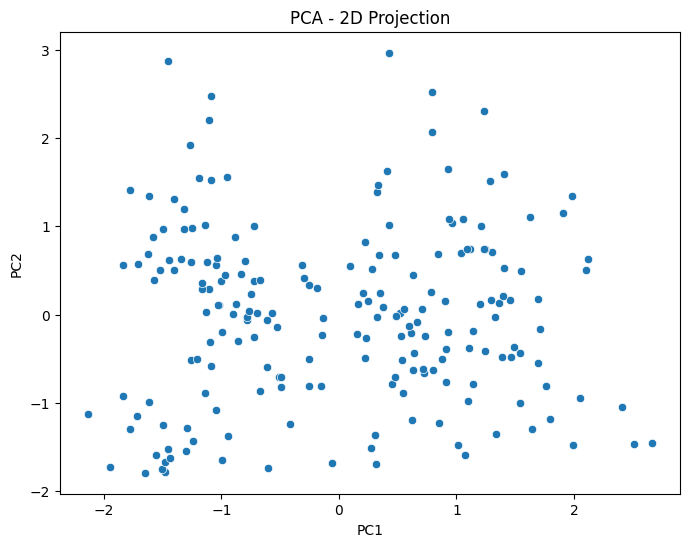

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA - 2D Projection')
plt.show()


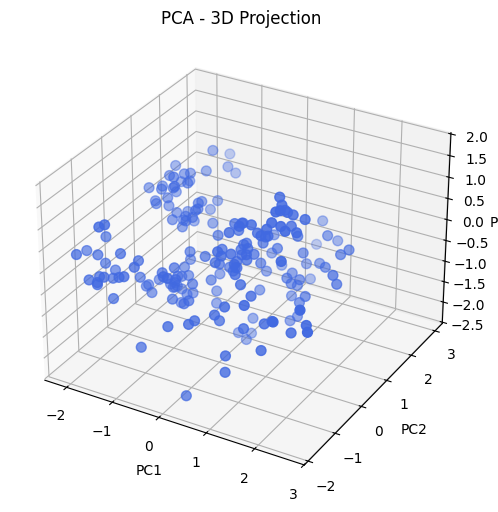

In [22]:
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(fscaled_df)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result_3d[:,0], pca_result_3d[:,1], pca_result_3d[:,2], c='royalblue', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA - 3D Projection')
plt.show()


In [23]:
df_pca_3d = pd.DataFrame(data = pca_result_3d,
                         columns = ['PC1', 'PC2', 'PC3'])


print(df_pca_3d.head())

        PC1       PC2       PC3
0 -0.600438 -1.737179 -1.322247
1 -1.649886 -1.789124 -0.067789
2  0.315381 -1.692772 -2.179818
3 -1.477989 -1.781317 -0.078518
4 -0.060545 -1.678691 -0.688083


In [24]:
pca_3d.components_[0]

array([ 0.03733834,  0.70603307, -0.04460546, -0.70578574])

In [25]:
pca_3d.components_[1]

array([ 0.03945288,  0.02677853,  0.99827635, -0.03421569])

In [26]:
pca_3d.components_[2]

array([0.00260619, 0.70706538, 0.00516666, 0.7071245 ])

In [27]:
print("Explained variance ratio:", pca_3d.explained_variance_ratio_)


Explained variance ratio: [0.4095285  0.3081674  0.20723465]


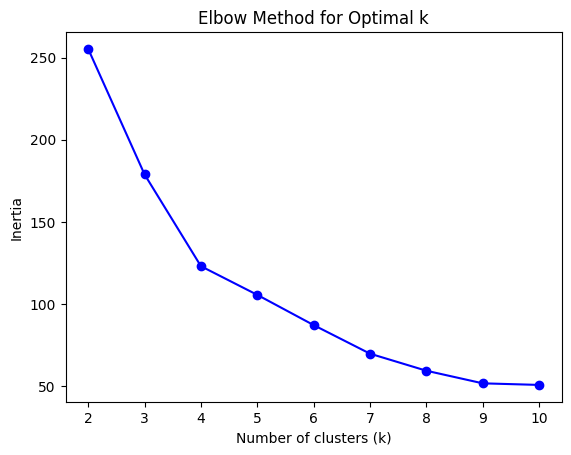

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


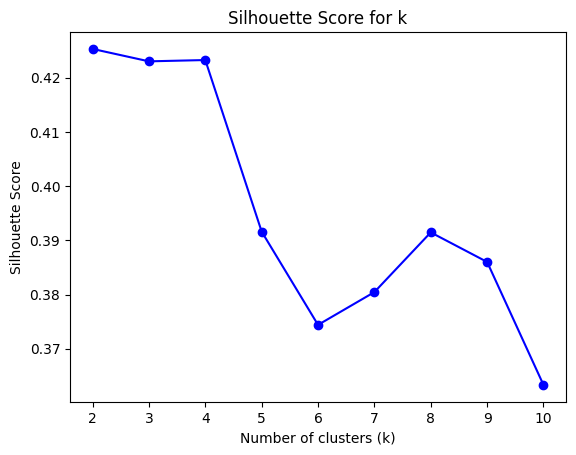

In [29]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df)
    sil_scores.append(silhouette_score(pca_df, labels))

plt.plot(K, sil_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k')
plt.show()


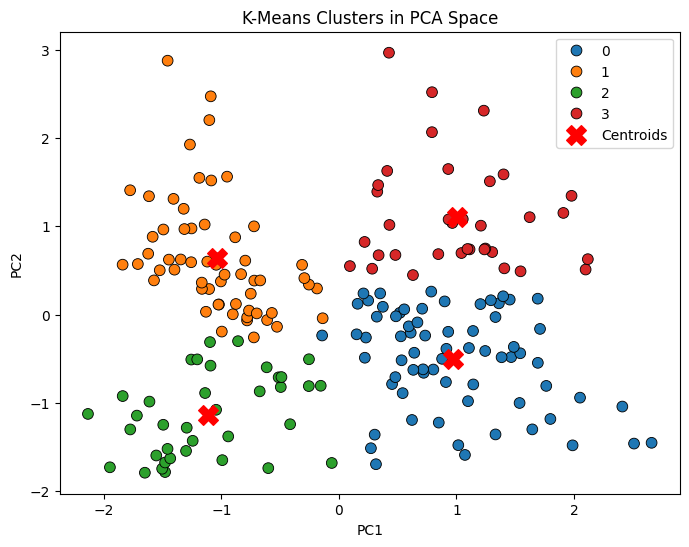

In [30]:
# Fit K-Means
optimal_k = 4 # change this to your chosen k from Elbow/Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df['KMeans_Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='KMeans_Cluster',
    palette='tab10',
    s=60,
    edgecolor='black'
)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200, c='red', marker='X', label='Centroids'
)
plt.title('K-Means Clusters in PCA Space')
plt.legend()
plt.show()



🟦 Cluster 0 (blue, bottom-right)

High PC1 → older, low-spending

Low PC2 → low income
🔸 Likely older, lower-income, conservative customers — “low activity” group.





🟧 Cluster 1 (orange, top-left)

Low PC1 → younger, high spenders

High PC2 → high income
🔸 Likely young, high-income, active spenders
(“premium lifestyle” group)





🟩 Cluster 2 (green, bottom-left)

Low PC1 → younger, high spenders

Low PC2 → low income
🔸 Likely young, low-income spenders — perhaps students or budget-conscious youth.





🟥 Cluster 3 (red, top-right)

High PC1 → older, lower spenders

High PC2 → high income
🔸 Likely wealthy but conservative older customers





In [31]:
print(kmeans.cluster_centers_)

[[ 0.97462678 -0.50386263]
 [-1.03926917  0.64498102]
 [-1.10942652 -1.13755008]
 [ 1.00332613  1.10862843]]


each cluster is represented by a centroid, which is the average position of all points that belong to that cluster.


In [32]:
pca_df.head()

,PC1,PC2,KMeans_Cluster
0,-0.600438,-1.737179,2
1,-1.649886,-1.789124,2
2,0.315381,-1.692772,0
3,-1.477989,-1.781317,2
4,-0.060545,-1.678691,2


In [33]:
pca_df = pca_df.drop('KMeans_Cluster', axis=1)


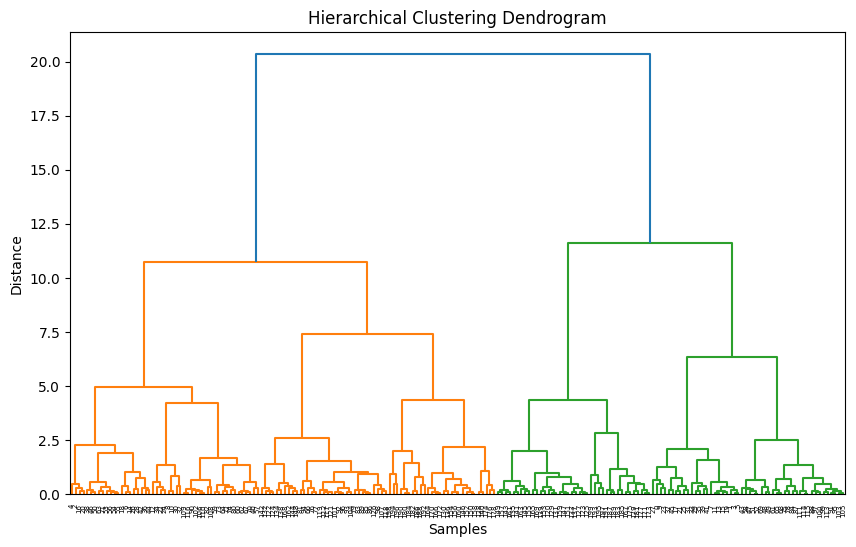

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(10, 6))
Z = linkage(pca_df, method='ward')   # 'ward' minimizes variance
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


cut a horizontal line at distance 10

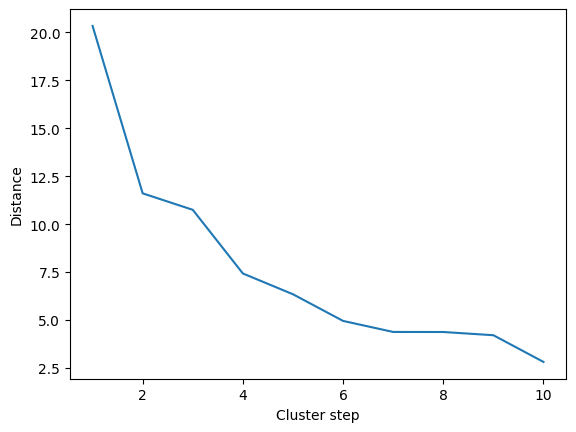

In [35]:
last = Z[-10:, 2]  # last 10 merge distances
plt.plot(range(1, 11), last[::-1])
plt.ylabel('Distance')
plt.xlabel('Cluster step')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hier_labels = agg.fit_predict(pca_df)
pca_df['Hierarchical_Cluster'] = hier_labels


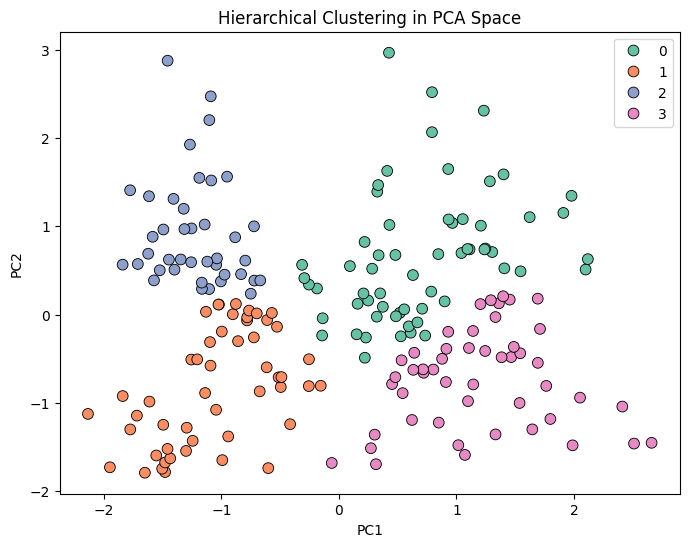

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Hierarchical_Cluster',
    data=pca_df,
    palette='Set2',
    s=60,
    edgecolor='black'
)
plt.title('Hierarchical Clustering in PCA Space')
plt.legend()
plt.show()


In [38]:
pca_df = pca_df.drop('Hierarchical_Cluster', axis=1)



In [39]:
pca_df.head()

,PC1,PC2
0,-0.600438,-1.737179
1,-1.649886,-1.789124
2,0.315381,-1.692772
3,-1.477989,-1.781317
4,-0.060545,-1.678691


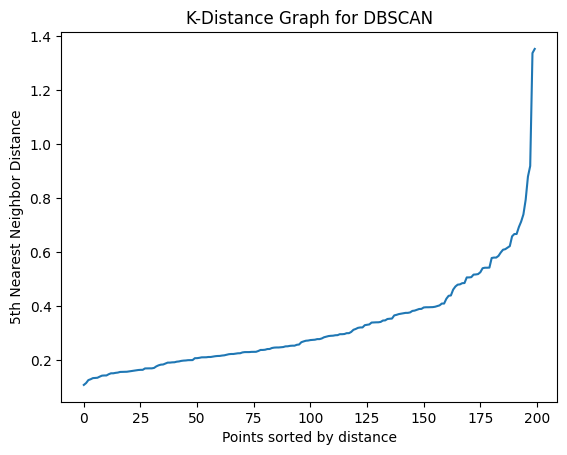

In [40]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)
distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()


Points within radius 0.45 and with ≥5 neighbors form core points.

Points that don’t meet this density criterion become noise or outliers.

In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(pca_df)

pca_df['DBSCAN_Cluster'] = db_labels


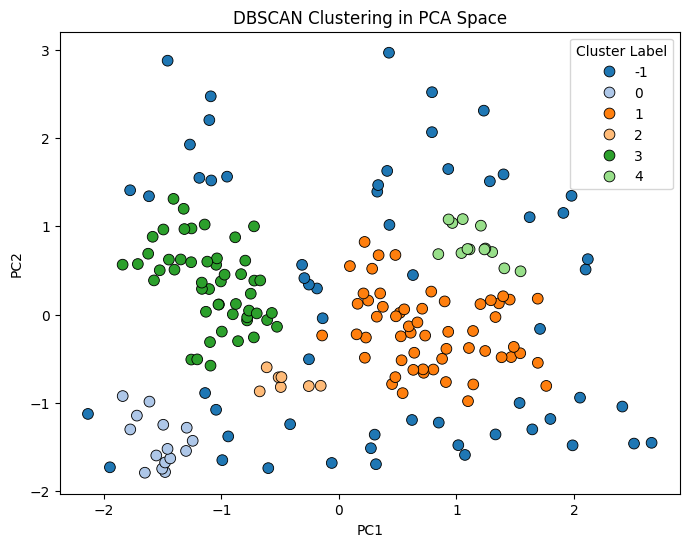

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='DBSCAN_Cluster',
    data=pca_df,
    palette='tab20',
    s=60,
    edgecolor='black'
)
plt.title('DBSCAN Clustering in PCA Space')
plt.legend(title='Cluster Label')
plt.show()


In [52]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

X = pca_df[['PC1', 'PC2']].values


In [53]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

kmeans_sil = silhouette_score(X, kmeans_labels)
kmeans_dbi = davies_bouldin_score(X, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X, kmeans_labels)

print("🔹 K-Means Metrics:")
print(f"Silhouette Score: {kmeans_sil:.3f}")
print(f"Davies-Bouldin Index: {kmeans_dbi:.3f}")
print(f"Calinski-Harabasz Score: {kmeans_ch:.3f}")


🔹 K-Means Metrics:
Silhouette Score: 0.423
Davies-Bouldin Index: 0.819
Calinski-Harabasz Score: 182.209


In [54]:
hier = AgglomerativeClustering(n_clusters=4, linkage='ward')
hier_labels = hier.fit_predict(X)

hier_sil = silhouette_score(X, hier_labels)
hier_dbi = davies_bouldin_score(X, hier_labels)
hier_ch = calinski_harabasz_score(X, hier_labels)

print("\n🔹 Hierarchical Clustering Metrics:")
print(f"Silhouette Score: {hier_sil:.3f}")
print(f"Davies-Bouldin Index: {hier_dbi:.3f}")
print(f"Calinski-Harabasz Score: {hier_ch:.3f}")



🔹 Hierarchical Clustering Metrics:
Silhouette Score: 0.364
Davies-Bouldin Index: 0.917
Calinski-Harabasz Score: 161.924


In [ ]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)


if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) != 1:
    dbscan_sil = silhouette_score(X, dbscan_labels)
    dbscan_dbi = davies_bouldin_score(X, dbscan_labels)
    dbscan_ch = calinski_harabasz_score(X, dbscan_labels)
else:
    dbscan_sil = dbscan_dbi = dbscan_ch = np.nan  # not valid

print("\n🔹 DBSCAN Metrics:")
print(f"Silhouette Score: {dbscan_sil:.3f}")
print(f"Davies-Bouldin Index: {dbscan_dbi:.3f}")
print(f"Calinski-Harabasz Score: {dbscan_ch:.3f}")



🔹 DBSCAN Metrics:
Silhouette Score: 0.287
Davies-Bouldin Index: 2.101
Calinski-Harabasz Score: 19.242


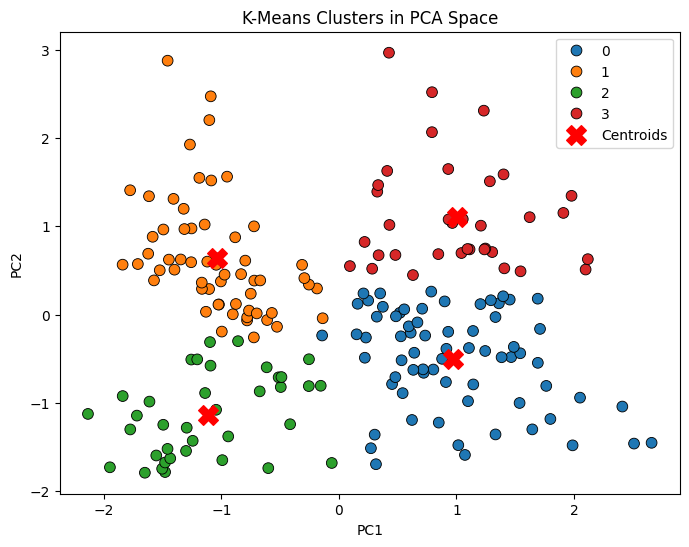

In [56]:
# Fit K-Means
optimal_k = 4 # change this to your chosen k from Elbow/Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df['KMeans_Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='KMeans_Cluster',
    palette='tab10',
    s=60,
    edgecolor='black'
)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200, c='red', marker='X', label='Centroids'
)
plt.title('K-Means Clusters in PCA Space')
plt.legend()
plt.show()


In [57]:
pca_df['KMeans_Cluster'] = kmeans.labels_


In [60]:
clustered_df = original_df.copy()
clustered_df['Cluster'] = kmeans.labels_


In [62]:
clustered_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,2


In [61]:
# For numerical features
cluster_summary = clustered_df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'median'])

# For categorical (e.g., Gender)
gender_mode = clustered_df.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])

print(cluster_summary)
print(gender_mode)


               Age        Annual Income (k$)        Spending Score (1-100)  \
              mean median               mean median                   mean   
Cluster                                                                      
0        52.144928   50.0          46.333333   48.0              40.072464   
1        29.932203   30.0          78.661017   76.0              70.491525   
2        25.594595   24.0          32.054054   33.0              67.864865   
3        41.685714   43.0          88.228571   85.0              17.285714   

                
        median  
Cluster         
0         46.0  
1         74.0  
2         72.0  
3         16.0  
Cluster
0    0
1    0
2    0
3    1
Name: Gender, dtype: int64


Cluster	Age (Mean)	Income (Mean)	Spending Score (Mean)	Dominant Gender	Persona Summary
0	52.1	46.3k	40.1	Male (0)	“Mature, Moderate Earners, Cautious Spenders”
1	29.9	78.7k	70.5	Male (0)	“Young, High Earners, Enthusiastic Spenders”
2	25.6	32.1k	67.9	Male (0)	“Young, Low Income, Aspirational Spenders”
3	41.7	88.2k	17.3	Female (1)	“Middle-aged, Wealthy, Reserved Shoppers”

🟩 Cluster 0 — “Mature, Moderate Earners, Cautious Spenders”

Age: Around 52 years (oldest group)

Income: Moderate (~46k)

Spending Score: Low-to-moderate (~40)

Gender: Mostly male

These are established, older males with steady income but frugal spending habits.
→ They may value savings, reliability, and practicality over luxury.

🟦 Cluster 1 — “Young, High Earners, Enthusiastic Spenders”

Age: Around 30 years (young professionals)

Income: High (~78k)

Spending Score: High (~70)

Gender: Mostly male

These are affluent young men, possibly career-oriented individuals who enjoy premium experiences and lifestyle spending.
→ Ideal targets for luxury, travel, or high-end retail.

🟨 Cluster 2 — “Young, Low Income, Aspirational Spenders”

Age: Around 25 years (youngest group)

Income: Low (~32k)

Spending Score: High (~68)

Gender: Mostly male

These customers spend disproportionately to their income — possibly trend-driven or brand-conscious youth.
→ They respond well to affordable luxury, installment plans, and influencer marketing.

🟥 Cluster 3 — “Middle-aged, Wealthy, Reserved Shoppers”

Age: Around 42 years

Income: Highest (~88k)

Spending Score: Lowest (~17)

Gender: Mostly female

Despite high income, they spend conservatively — perhaps family-focused or savings-oriented consumers.
→ Ideal for value-driven products, quality assurance, and loyalty programs.

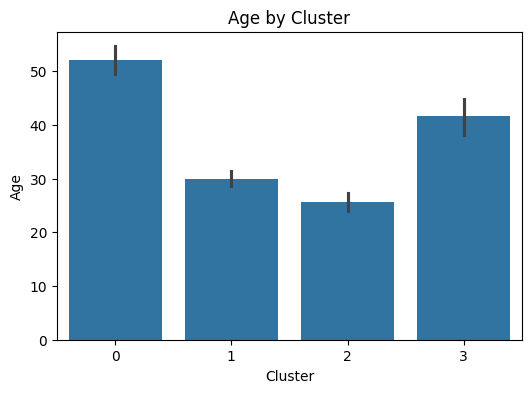

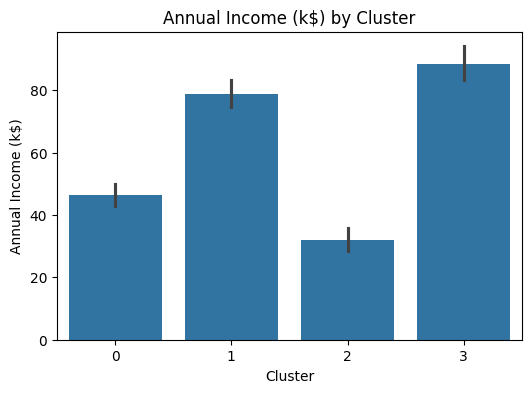

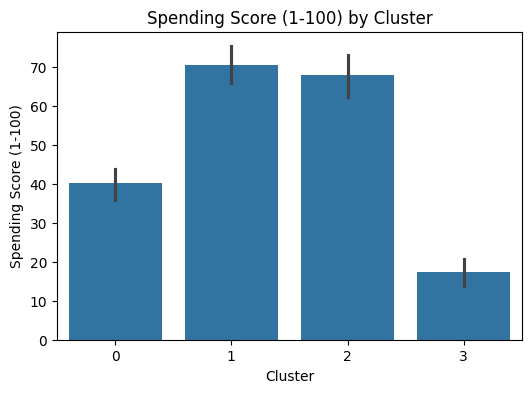

In [63]:
import matplotlib.pyplot as plt

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.barplot(x=clustered_df['Cluster'], y=clustered_df[feature])
    plt.title(f'{feature} by Cluster')
    plt.show()


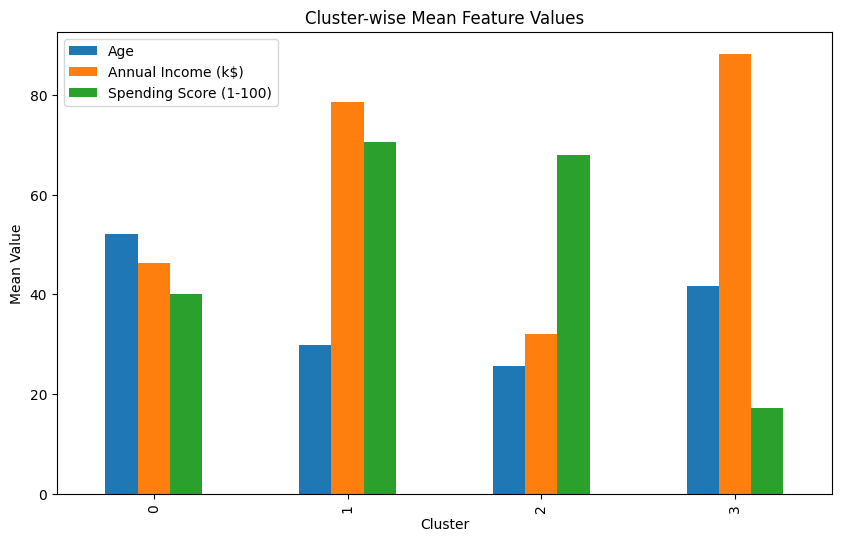

In [67]:
cluster_summary_means = cluster_summary.xs('mean', axis=1, level=1)
cluster_summary_means.plot(kind='bar', figsize=(10,6))
plt.title("Cluster-wise Mean Feature Values")
plt.ylabel("Mean Value")
plt.show()


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import seaborn as sns


In [2]:
X_blobs, y_blobs = make_blobs(
    n_samples=500,      # total points
    centers=4,          # number of clusters
    cluster_std=1.2,    # how spread out each cluster is
    random_state=42
)


In [3]:
X_moons, y_moons = make_moons(
    n_samples=500,
    noise=0.08,          # noise adds irregularity
    random_state=42
)


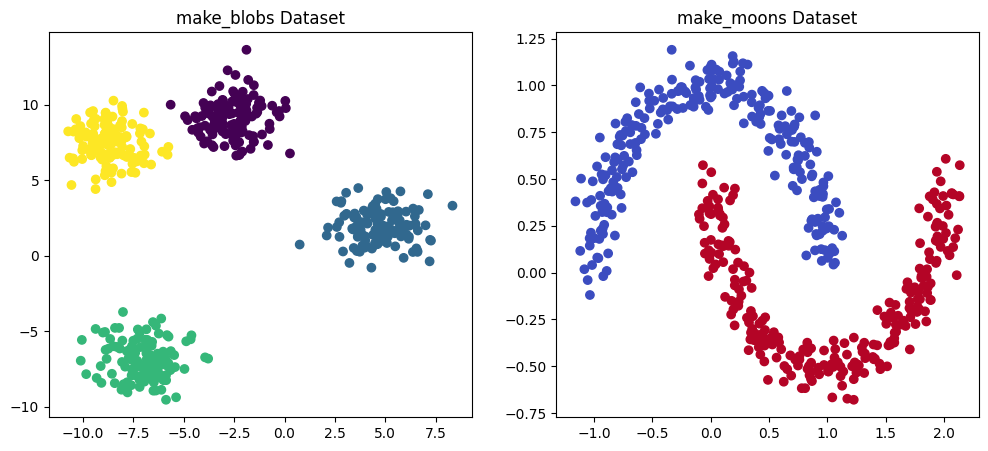

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis')
axes[0].set_title("make_blobs Dataset")

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm')
axes[1].set_title("make_moons Dataset")

plt.show()


In [5]:
# --- On blobs ---
kmeans_blobs = KMeans(n_clusters=4, random_state=42).fit(X_blobs)
dbscan_blobs = DBSCAN(eps=1.5, min_samples=5).fit(X_blobs)

# --- On moons ---
kmeans_moons = KMeans(n_clusters=2, random_state=42).fit(X_moons)
dbscan_moons = DBSCAN(eps=0.2, min_samples=5).fit(X_moons)


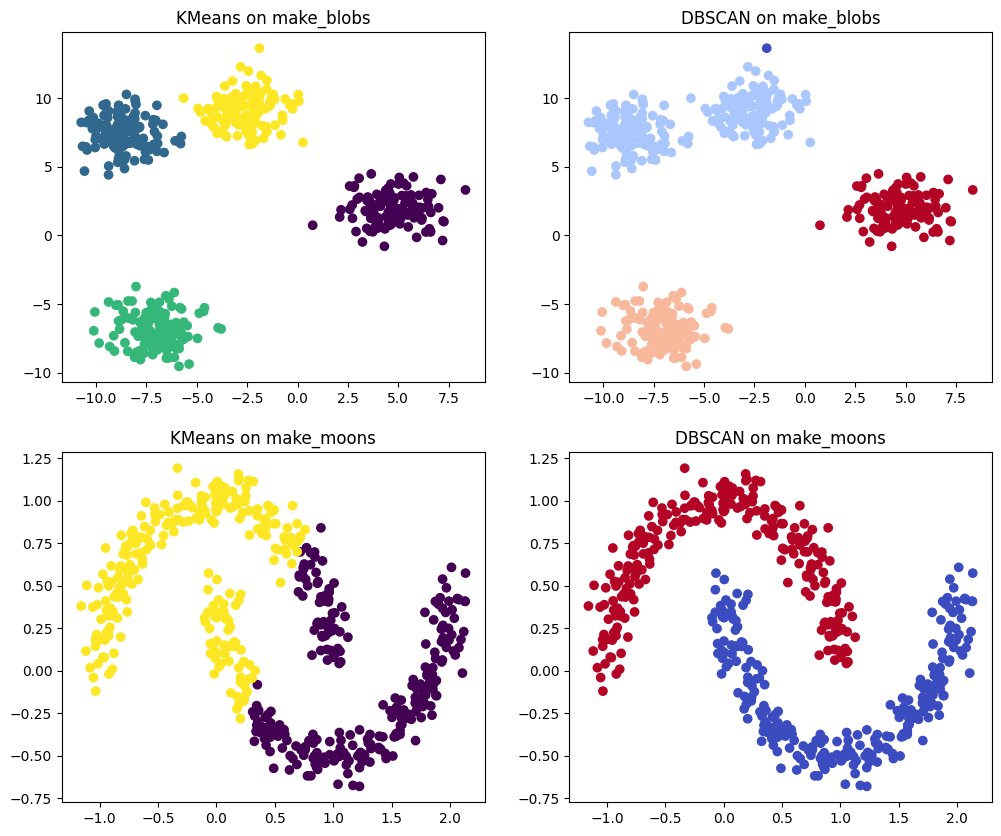

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmeans_blobs.labels_, cmap='viridis')
axes[0, 0].set_title("KMeans on make_blobs")

axes[0, 1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=dbscan_blobs.labels_, cmap='coolwarm')
axes[0, 1].set_title("DBSCAN on make_blobs")

axes[1, 0].scatter(X_moons[:, 0], X_moons[:, 1], c=kmeans_moons.labels_, cmap='viridis')
axes[1, 0].set_title("KMeans on make_moons")

axes[1, 1].scatter(X_moons[:, 0], X_moons[:, 1], c=dbscan_moons.labels_, cmap='coolwarm')
axes[1, 1].set_title("DBSCAN on make_moons")

plt.show()


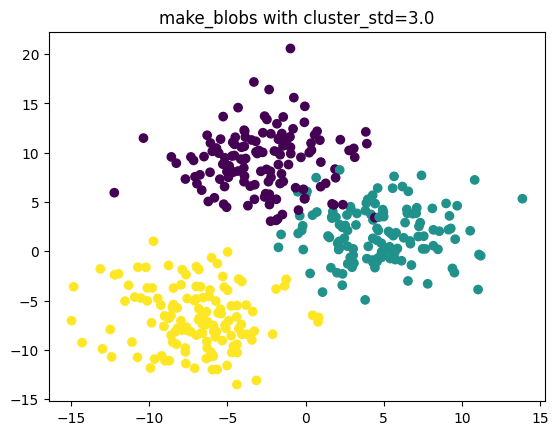

In [8]:
# Change number of clusters and standard deviation
X_blobs_var, y_blobs_var = make_blobs(n_samples=400, centers=3, cluster_std=3.0, random_state=42)
plt.scatter(X_blobs_var[:,0], X_blobs_var[:,1], c=y_blobs_var, cmap='viridis')
plt.title("make_blobs with cluster_std=3.0")
plt.show()


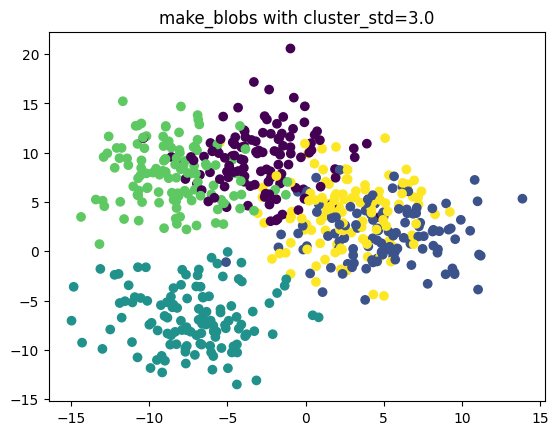

In [17]:
# Change number of clusters and standard deviation
X_blobs_var, y_blobs_var = make_blobs(n_samples=600, centers=5, cluster_std=3.0, random_state=42)
plt.scatter(X_blobs_var[:,0], X_blobs_var[:,1], c=y_blobs_var, cmap='viridis')
plt.title("make_blobs with cluster_std=3.0")
plt.show()
